# 1) Load futures data (binance)

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import time

from data.data_management import DataManager

config = {"general":{"db_update": False,
                     "db_path": "D:/OneDrive/database/",
                     "output": "telegram/"},
          "strategy": {"instruments":["ftx_BTC/USD",
                                      "ftx_ETH/USD",
                                      # "ftx_SOL/USD",
                                      # "ftx_FTT/USD",
                                      # "ftx_FTM/USD",
                                      # "ftx_TSM/USD",
                                      # "ftx_NVDA/USD",
                                      # "ftx_AMD/USD",
                                      # "ftx_TSLA/USD",
                                      ],
                       "timeframes": ["1h","2h","3h","4h","6h","12h","24h", "48h"],
                       "indicators": {'tide': {'window': [12,24,72], "sensitivity": [90], "thresholds": [10]},
                                      # 'ema': {'length': [13,21,34,55], 'close': ['close']}, 
                                      'mfi': {'length': [5,8,13,21,34,55], 'close': ['close']},
                                      # 'slopes': {'slope_lengths':[7,10,14,20,28,40,56,80],
                                      #           'scaling_factor':[1],
                                      #           'lookback':[500],
                                      #            'logRet_norm_window':[10],
                                      #           'upper_quantile':[0.9]}
                                      },
                       "resample": True
                      },

          }



data_manager = DataManager(instruments = config["strategy"]["instruments"],
                           db_path = config["general"]["db_path"],
                           update_db = config["general"]["db_update"],
                           timeframes = config["strategy"]["timeframes"],
                           indicators = config["strategy"]["indicators"],
                           resample = config["strategy"]["resample"],
                           )

klines_indicators_dict =  data_manager.load_data()

for instrument,df in klines_indicators_dict.items():
    print(f"{instrument}: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")
    
# Select one
df0 = klines_indicators_dict["ftx_BTC/USD"].copy()

In [3]:
df_BTC = data["BTCUSDT"]["1h"][['openTime', 'open', 'high', 'low', 'close', 'volume', 'closeTime','quote_vol', 'nTrades']].copy()
df_ETH = data["ETHUSDT"]["1h"][['openTime', 'open', 'high', 'low', 'close', 'volume', 'closeTime','quote_vol', 'nTrades']].copy()
cutoff_start = max(df_BTC.index[0],df_ETH.index[0])
df_BTC = df_BTC[cutoff_start:]
df_ETH = df_ETH[cutoff_start:]
print(f"BTCUSDT TOTAL window: {df_BTC.index[0]} ----> {df_BTC.index[-1]}, len: {len(df_BTC)}")
print(f"ETHUSDT TOTAL window: {df_ETH.index[0]} ----> {df_ETH.index[-1]}, len: {len(df_ETH)}")

# df_BTC = df_BTC.iloc[:int(len(df_BTC)*0.7),:]
# df_ETH = df_ETH.iloc[:int(len(df_ETH)*0.7),:]
# print(f"BTCUSDT window: {df_BTC.index[0]} ----> {df_BTC.index[-1]}, len: {len(df_BTC)}")
# print(f"ETHUSDT window: {df_ETH.index[0]} ----> {df_ETH.index[-1]}, len: {len(df_ETH)}")

BTCUSDT TOTAL window: 2019-11-27 08:00:00 ----> 2022-06-23 08:00:00, len: 22537
ETHUSDT TOTAL window: 2019-11-27 08:00:00 ----> 2022-06-23 08:00:00, len: 22537


<IPython.core.display.Javascript object>


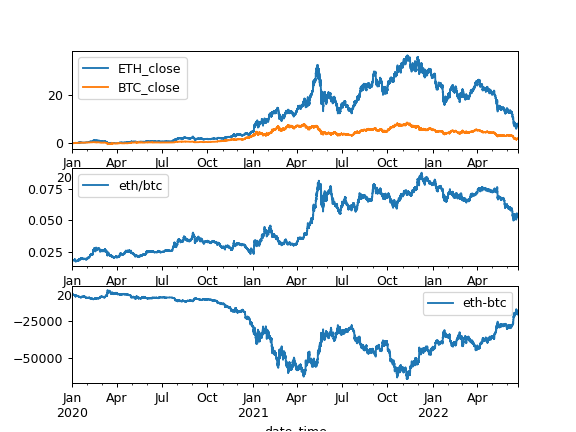

<AxesSubplot:xlabel='date_time'>

In [28]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hedge_ratio = 1
window = ["2020-01-01","2022-07-01"]

df = pd.DataFrame()
# df["ETH_close"] = np.log(df_ETH["close"])
# df["BTC_close"] = np.log(df_BTC["close"])
df["ETH_close"] = df_ETH["close"][window[0]:window[1]]
df["BTC_close"] = df_BTC["close"][window[0]:window[1]]
# df["ETH_return"] = df["ETH_close"].pct_change().cumsum()#.add(1).cumprod().sub(1)
# df["BTC_return"] = df["BTC_close"].pct_change().cumsum()#.add(1).cumprod().sub(1)
df["eth-btc"] = df["ETH_close"] - hedge_ratio*df["BTC_close"] #df["ETH_return"] - df["BTC_return"]
df["eth/btc"] = df["ETH_close"]/df["BTC_close"] #df["ETH_return"] - df["BTC_return"]

fig, axs = plt.subplots(3,1)

df[["ETH_close", "BTC_close"]].pct_change().add(1).cumprod().sub(1).plot(ax=axs[0])
# df[["ETH_return", "BTC_return"]].plot(ax=axs[1])
df[["eth/btc"]].plot(ax=axs[1])
df[["eth-btc"]].plot(ax=axs[2])

In [3]:
from data.pickler import pickle_klines
data = pickle_klines()
df=data["SGX_TWN1!"]

# Transformer

In [33]:
df

,ETH_close,BTC_close,eth-btc,eth/btc
date_time,,,,
2020-01-01 00:00:00,129.12,7189.00,-7059.88,0.017961
2020-01-01 01:00:00,128.82,7171.55,-7042.73,0.017963
2020-01-01 02:00:00,130.57,7210.24,-7079.67,0.018109
2020-01-01 03:00:00,130.80,7237.99,-7107.19,0.018071
2020-01-01 04:00:00,130.09,7221.65,-7091.56,0.018014
...,...,...,...,...
2022-06-23 04:00:00,1075.58,20202.90,-19127.32,0.053239
2022-06-23 05:00:00,1086.71,20345.50,-19258.79,0.053413
2022-06-23 06:00:00,1084.82,20338.00,-19253.18,0.053340


In [32]:
from darts import TimeSeries

In [74]:
ts = TimeSeries.from_dataframe(df,
                                   value_cols=["eth-btc"],
                                   fill_missing_dates=True)

In [75]:
ts.pd_dataframe()

component,eth-btc
date_time,
2020-01-01 00:00:00,-7059.88
2020-01-01 01:00:00,-7042.73
2020-01-01 02:00:00,-7079.67
2020-01-01 03:00:00,-7107.19
2020-01-01 04:00:00,-7091.56
...,...
2022-06-23 04:00:00,-19127.32
2022-06-23 05:00:00,-19258.79
2022-06-23 06:00:00,-19253.18


In [95]:
EPOCHS = 10
INLEN = 32
HIDDEN = 64
LSTMLAYERS = 1
ATTHEADS = 1
DROPOUT = 0.1
BATCH = 32

N_FC = 36           # default forecast horizon
RAND = 42           # set random state
N_SAMPLES = 100     # number of times a prediction is sampled from a probabilistic model
N_JOBS = 3          # parallel processors to use;  -1 = all processors

# default quantiles for QuantileRegression
QUANTILES = [0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]

TRAIN = "2022-01-01"  # train/test split
MSEAS = 60          # max seasonality to check: months
ALPHA = 0.05        # significance level for seasonality test
FIGSIZE = (9, 6)

qL1, qL2, qL3 = 0.01, 0.05, 0.10        # percentiles of predictions: lower bounds
qU1, qU2, qU3 = 1-qL1, 1-qL2, 1-qL3     # upper bounds derived from lower bounds
label_q1 = f'{int(qU1 * 100)} / {int(qL1 * 100)} percentile band'
label_q2 = f'{int(qU2 * 100)} / {int(qL2 * 100)} percentile band'
label_q3 = f'{int(qU3 * 100)} / {int(qL3 * 100)} percentile band'

In [96]:
from darts.dataprocessing.transformers import Scaler

In [97]:
# train/test
if isinstance(TRAIN, str):
    split = pd.Timestamp(TRAIN)
else:
    split = TRAIN
ts_train, ts_test = ts.split_after(split)

# scale the time series on the training settransformer = Scaler()
transformer = Scaler()
ts_ttrain = transformer.fit_transform(ts_train)
ts_ttest = transformer.transform(ts_test)
ts_t = transformer.transform(ts)

In [98]:
ts_ttrain.pd_dataframe()

component,eth-btc
date_time,
2020-01-01 00:00:00,0.948371
2020-01-01 01:00:00,0.948658
2020-01-01 02:00:00,0.948041
2020-01-01 03:00:00,0.947581
2020-01-01 04:00:00,0.947842
...,...
2021-12-31 20:00:00,0.363720
2021-12-31 21:00:00,0.361342
2021-12-31 22:00:00,0.354631


In [99]:
ts_ttest.pd_dataframe()

component,eth-btc
date_time,
2022-01-01 01:00:00,0.349596
2022-01-01 02:00:00,0.347681
2022-01-01 03:00:00,0.347246
2022-01-01 04:00:00,0.347273
2022-01-01 05:00:00,0.348675
...,...
2022-06-23 04:00:00,0.746922
2022-06-23 05:00:00,0.744727
2022-06-23 06:00:00,0.744821


In [100]:
from darts.models import TFTModel
from darts.utils.likelihood_models import QuantileRegression

In [101]:
input_chunk_length = 24
forecast_horizon = 12


model = TFTModel(   input_chunk_length=input_chunk_length,
                    output_chunk_length=forecast_horizon,
                    hidden_size=HIDDEN,
                    lstm_layers=1,  #LSTMLAYERS,
                    num_attention_heads=ATTHEADS,
                    dropout=DROPOUT,
                    batch_size=BATCH,
                    n_epochs=EPOCHS,
                    likelihood=QuantileRegression(quantiles=QUANTILES), 
                    add_relative_index=True,
                    # loss_fn=MSELoss(),
                    random_state=RAND, 
                    force_reset=True,
                pl_trainer_kwargs={"accelerator": "gpu",
                                   "gpus": [0]},
                )

In [102]:
# training
model.fit(series = ts_ttrain, # series serving as target, to be trained to forecast
          past_covariates = 
          verbose=True)

2022-07-12 23:34:26 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 17478 samples.
2022-07-12 23:34:26 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-12 23:34:26 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-12 23:34:26 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-12 23:34:26 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-12 23:34:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-12 23:34:26 pytorch_lightning.callbacks.model_summary INFO: 
   | Name                              | Type                             | Params
----------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0     
1  | val_metrics    

Training: 0it [00:00, ?it/s]

In [103]:
# testing: generate predictions
"""
predict(n, *args, **kwargs)[source]
Predict the n time step following the end of the training series, or of the specified series.

Prediction is performed with a PyTorch Lightning Trainer. It uses a default Trainer object from presets and pl_trainer_kwargs used at model creation. You can also use a custom Trainer with optional parameter trainer. For more information on PyTorch Lightning Trainers check out this link .

Below, all possible parameters are documented, but not all models support all parameters. For instance, all the PastCovariatesTorchModel support only past_covariates and not future_covariates. Darts will complain if you try calling predict() on a model with the wrong covariates argument.

Darts will also complain if the provided covariates do not have a sufficient time span. In general, not all models require the same covariates’ time spans:

Models relying on past covariates require the last input_chunk_length of the past_covariates
points to be known at prediction time. For horizon values n > output_chunk_length, these models
require at least the next n - output_chunk_length future values to be known as well.
Models relying on future covariates require the next n values to be known.
In addition (for DualCovariatesTorchModel and MixedCovariatesTorchModel), they also
require the “historic” values of these future covariates (over the past input_chunk_length).
When handling covariates, Darts will try to use the time axes of the target and the covariates to come up with the right time slices. So the covariates can be longer than needed; as long as the time axes are correct Darts will handle them correctly. It will also complain if their time span is not sufficient.

Parameters
n – The number of time steps after the end of the training time series for which to produce predictions

series – Optionally, a series or sequence of series, representing the history of the target series whose future is to be predicted. If specified, the method returns the forecasts of these series. Otherwise, the method returns the forecast of the (single) training series.

past_covariates – Optionally, the past-observed covariates series needed as inputs for the model. They must match the covariates used for training in terms of dimension.

future_covariates – Optionally, the future-known covariates series needed as inputs for the model. They must match the covariates used for training in terms of dimension.

trainer – Optionally, a custom PyTorch-Lightning Trainer object to perform prediction. Using a custom trainer will override Darts’ default trainer.

batch_size – Size of batches during prediction. Defaults to the models’ training batch_size value.

verbose – Optionally, whether to print progress.

n_jobs – The number of jobs to run in parallel. -1 means using all processors. Defaults to 1.

roll_size – For self-consuming predictions, i.e. n > output_chunk_length, determines how many outputs of the model are fed back into it at every iteration of feeding the predicted target (and optionally future covariates) back into the model. If this parameter is not provided, it will be set output_chunk_length by default.

num_samples – Number of times a prediction is sampled from a probabilistic model. Should be left set to 1 for deterministic models.

num_loader_workers – Optionally, an integer specifying the num_workers to use in PyTorch DataLoader instances, for the inference/prediction dataset loaders (if any). A larger number of workers can sometimes increase performance, but can also incur extra overheads and increase memory usage, as more batches are loaded in parallel.

mc_dropout – Optionally, enable monte carlo dropout for predictions using neural network based models. This allows bayesian approximation by specifying an implicit prior over learned models.

Returns
One or several time series containing the forecasts of series, or the forecast of the training series if series is not specified and the model has been trained on a single series.

Return type
Union[TimeSeries, Sequence[TimeSeries]]

"""
ts_tpred = model.predict(n=len(ts_test), 
                         num_samples=N_SAMPLES,   
                         n_jobs=-1)

2022-07-12 23:47:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 547it [00:00, ?it/s]

In [104]:
# testing: helper function: plot predictions
from darts.metrics import mape
def plot_predict(ts_actual, ts_test, ts_pred):
    
    ## plot time series, limited to forecast horizon
    plt.figure(figsize=FIGSIZE)
    
    ts_actual.plot(label="actual")                                       # plot actual
    
    ts_pred.plot(low_quantile=qL1, high_quantile=qU1, label=label_q1)    # plot U1 quantile band
    #ts_pred.plot(low_quantile=qL2, high_quantile=qU2, label=label_q2)   # plot U2 quantile band
    ts_pred.plot(low_quantile=qL3, high_quantile=qU3, label=label_q3)    # plot U3 quantile band
    ts_pred.plot(central_quantile="mean", label="expected")              # plot "mean" or median=0.5
    
    plt.title("TFT: test set (MAPE: {:.2f}%)".format(mape(ts_test, ts_pred)))
    plt.legend();  

In [105]:
ts_pred.quantile_df()

,eth-btc_0.5
date_time,
2021-01-01 01:00:00,-25787.837757
2021-01-01 02:00:00,-26041.070389
2021-01-01 03:00:00,-26182.821638
2021-01-01 04:00:00,-26068.503395
2021-01-01 05:00:00,-26210.539626
...,...
2022-06-23 04:00:00,-25537.687526
2022-06-23 05:00:00,-24848.258109
2022-06-23 06:00:00,-24961.924998


<IPython.core.display.Javascript object>


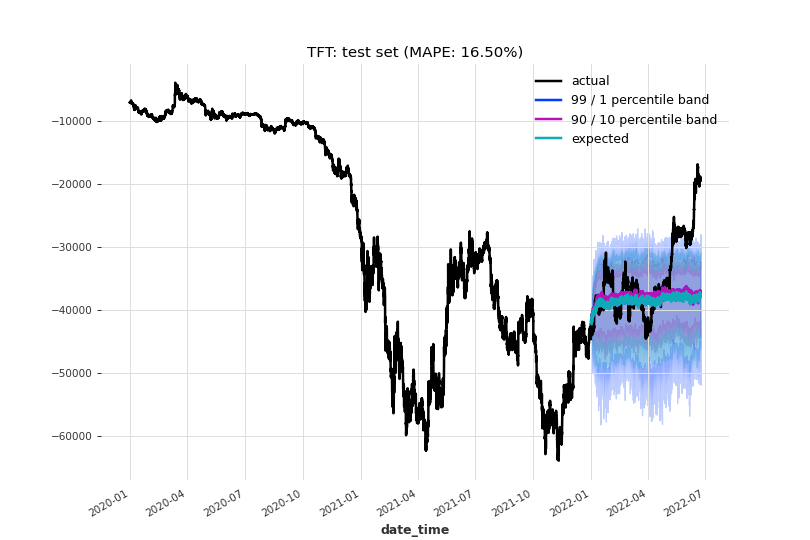

In [106]:
# testing: call helper function: plot predictions
ts_pred = transformer.inverse_transform(ts_tpred)
plot_predict(ts, ts_test, ts_pred)

# Catboost

In [ ]:
klines_dict["1h"]

In [ ]:
df = klines_dict["1h"].copy()
df["Y"] = df["close"].pct_change().shift(-1)
df.dropna(inplace=True)
features = ["tide", "ebb", "flow"]
label = ["Y"]

In [ ]:
import pandas as pd
import tensorflow as tf
import autokeras as ak

In [ ]:
val_split = int(len(df) * 0.7)
data_train = df[:val_split]
data_val = df[val_split:]

data_x = data_train[features].astype("float64")

data_x_val = data_val[features].astype("float64")

# Data with train data and the unseen data from subsequent time steps.
data_x_test = df[features].astype("float64")
data_y_val = data_val[label].astype("float64")
data_y = data_train[label].astype("float64")

print(data_x.shape)  # (6549, 12)
print(data_y.shape)  # (6549,)

In [ ]:
predict_from = 1
predict_until = 10
lookback = 3
clf = ak.TimeseriesForecaster(
    lookback=lookback,
    predict_from=predict_from,
    predict_until=predict_until,
    max_trials=1,
    objective="val_loss",
)
# Train the TimeSeriesForecaster with train data
clf.fit(
    x=data_x,
    y=data_y,
    validation_data=(data_x_val, data_y_val),
    batch_size=32,
    epochs=10,
)
# Predict with the best model(includes original training data).
predictions = clf.predict(data_x_test)
print(predictions.shape)
# Evaluate the best model with testing data.
print(clf.evaluate(data_x_val, data_y_val))

In [ ]:
model=clf.export_model()
model.summary()

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from scipy.stats import t
import tensorflow as tf
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import math

def Transformer_Database (Timestep, XData_AR, YData_AR):
    Features = XData_AR.shape[1]; Sample = XData_AR.shape[0]-Timestep+1
    XDataTrainScaledRNN=np.zeros([Sample, Timestep, Features]); YDataTrainRNN=np.zeros([Sample])
    for i in range(Sample):
        XDataTrainScaledRNN[i,:,:] = XData_AR[i:(Timestep+i)]
        YDataTrainRNN[i] = YData_AR[Timestep+i-1]
    return XDataTrainScaledRNN, YDataTrainRNN

#Transformer Keras Block
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential([tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
def Transformer_Model (Shape1, Shape2, HeadsAttention,Dropout, LearningRate):
    #Model struture is defined
    Input = tf.keras.Input(shape=(Shape1,Shape2), name="Input")
    #LSTM is applied on top of the transformer
    X = tf.keras.layers.LSTM(units=16, dropout=Dropout, return_sequences=True)(Input)
    #Tranformer architecture is implemented
    transformer_block_1 = TransformerBlock(embed_dim=16, num_heads=HeadsAttention, ff_dim=8, rate=Dropout)
    X = transformer_block_1(X)
    #Dense layers are used
    X = tf.keras.layers.GlobalAveragePooling1D()(X)
    X = tf.keras.layers.Dense(8, activation=tf.nn.sigmoid)(X)
    X = tf.keras.layers.Dropout(Dropout)(X)
    Output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid, name="Output")(X)
    model = tf.keras.Model(inputs=Input, outputs=Output)
    #Optimizer is defined
    Opt = tf.keras.optimizers.Adam(learning_rate=LearningRate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
    #Model is compiled
    model.compile(optimizer=Opt, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

In [ ]:
model = Transformer_Model(XData_AR_Norm_T.shape[1], XData_AR_Norm_T.shape[2], HeadsAttention=4, Dropout=Dropout, LearningRate=LearningRate)
model.fit(XData_AR_Norm_T, YData_AR_Norm_T, epochs=Epochs, verbose=0, batch_size=BatchSize); tf.keras.backend.clear_session()